In [37]:
import torch
from data import get_data
import numpy as np
from torch_geometric.utils import to_edge_index
import matplotlib.pyplot as plt
import networkx as nx


METABRIC_PATH = "./data/MBdata_33CLINwMiss_1KfGE_1KfCNA.csv"
metabric = get_data(METABRIC_PATH)

labels = np.array(metabric["pam50"])
labels[labels == "LumA"] = "#ff0000"
labels[labels == "LumB"] = "#ff00ff"
labels[labels == "Normal"] = "#ffff00"
labels[labels == "Basal"] = "#3366ff"
labels[labels == "Her2"] = "#33cc33"

def load_adj(path):
    X = np.genfromtxt(path, delimiter=",")
    X = (X - X.min()) / (X.max() - X.min())
    np.fill_diagonal(X, 0)
    return X


def get_edge_index(path, threshold):
    X = load_adj(path)
    X[X < threshold] = 0
    return to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))


def print_graph(edge_index):
    H = nx.Graph()
    edges = [(int(e[0]), int(e[1])) for e in zip(edge_index[0], edge_index[1])]
    H.add_edges_from(edges)

    G = nx.Graph()
    G.add_nodes_from(sorted(H.nodes(data=True)))
    G.add_edges_from(H.edges(data=True))

    
    nx.draw_networkx(G, with_labels=False, node_color=labels[np.array(G.nodes())].tolist(), node_size=1, width=0.25)
        
    print("Total number of nodes: ", int(G.number_of_nodes()))
    print("Total number of edges: ", int(G.number_of_edges()))
    print("Max Degree for all nodes: ", np.array(G.degree())[:, 1].max())

    print("Total number of self-loops: ", int(nx.number_of_selfloops(G)))

    return G


# CLI

In [3]:
snf_cli = np.genfromtxt("./data/SNF/SNF_CLI.csv", delimiter=",")
np.fill_diagonal(snf_cli, 0)
snf_cli = (snf_cli-snf_cli.min())/(snf_cli.max()-snf_cli.min())

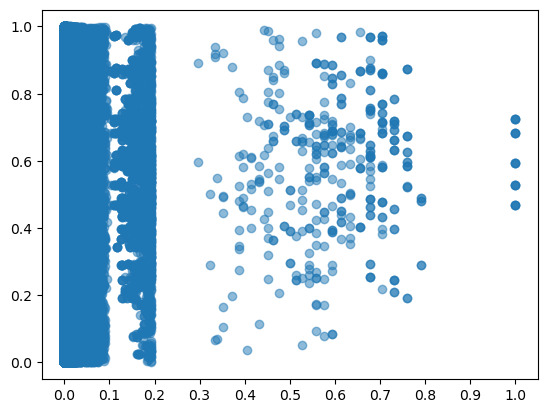

In [106]:
x= [k[0] for k in snf_cli.reshape(-1,1).tolist()]
y = np.linspace(0,1,len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i/10 for i in range(11)])
plt.show()

Total number of nodes:  279
Total number of edges:  207
List of all edges:  [(75, 1443), (104, 957), (130, 1856), (140, 1083), (152, 1349), (169, 1339), (169, 1359), (1339, 1359), (185, 1411), (210, 1818), (224, 1076), (327, 880), (336, 1234), (337, 1090), (342, 1936), (378, 1175), (378, 1237), (1175, 1237), (387, 1733), (407, 1899), (415, 1401), (415, 1549), (1401, 1549), (431, 1373), (465, 547), (484, 1300), (484, 1458), (1300, 1458), (486, 1246), (486, 1305), (486, 1416), (1246, 1305), (1246, 1416), (1305, 1416), (488, 683), (491, 1111), (493, 1225), (493, 1757), (1225, 1757), (494, 775), (501, 958), (501, 1480), (501, 1913), (958, 1480), (958, 1913), (1480, 1913), (514, 1144), (516, 741), (533, 1758), (538, 1358), (545, 1214), (570, 1360), (571, 946), (571, 965), (946, 965), (572, 1294), (573, 990), (577, 1204), (577, 1719), (1204, 1719), (583, 771), (583, 1014), (771, 1014), (631, 1006), (640, 1067), (666, 682), (692, 1198), (694, 993), (716, 1298), (716, 1519), (1298, 1519), (726

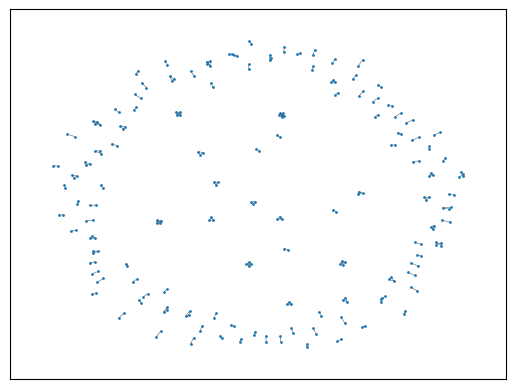

In [155]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_CLI.csv", 0.2)
G = print_graph(edge_index)

Total number of nodes:  842
Total number of edges:  1497
List of all edges:  [(0, 549), (549, 1055), (549, 1321), (8, 986), (10, 172), (172, 337), (172, 1090), (172, 1852), (16, 1548), (29, 1248), (30, 778), (30, 1502), (778, 1089), (778, 1104), (778, 1502), (778, 1506), (1502, 909), (1502, 1954), (32, 70), (36, 318), (318, 673), (318, 1281), (44, 1390), (45, 980), (980, 1136), (48, 488), (48, 555), (48, 683), (48, 905), (48, 921), (48, 1078), (48, 1249), (48, 1270), (48, 1567), (488, 570), (488, 683), (488, 757), (488, 1247), (488, 1360), (683, 570), (683, 757), (683, 1247), (683, 1360), (905, 976), (905, 1491), (905, 1744), (921, 508), (921, 570), (921, 906), (921, 976), (921, 1078), (921, 1360), (1078, 508), (1078, 570), (1078, 906), (1078, 976), (1078, 1360), (1249, 1247), (1249, 1270), (1249, 1567), (1249, 1796), (1270, 1247), (1270, 1567), (1270, 1796), (1567, 508), (1567, 757), (1567, 1491), (1567, 1744), (57, 67), (59, 1905), (1905, 385), (1905, 1428), (66, 113), (69, 188), (69

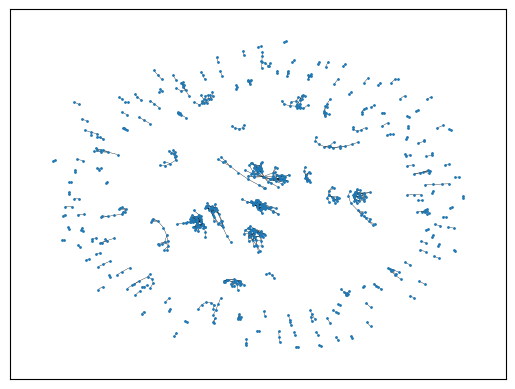

In [156]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_CLI.csv", 0.1)
G = print_graph(edge_index)

Total number of nodes:  1951
Total number of edges:  13311
List of all edges:  [(0, 20), (0, 128), (0, 376), (0, 381), (0, 464), (0, 492), (0, 497), (0, 549), (0, 586), (0, 706), (0, 709), (0, 770), (0, 794), (0, 1055), (0, 1321), (0, 1492), (0, 1746), (20, 128), (20, 376), (20, 464), (20, 492), (20, 497), (20, 770), (20, 1771), (128, 96), (128, 178), (128, 186), (128, 218), (128, 313), (128, 376), (128, 410), (128, 464), (128, 492), (128, 770), (128, 820), (376, 218), (376, 233), (376, 313), (376, 325), (376, 338), (376, 415), (376, 450), (376, 464), (376, 492), (376, 770), (376, 1401), (376, 1528), (376, 1549), (381, 73), (381, 320), (381, 338), (381, 492), (381, 497), (381, 549), (381, 770), (381, 824), (381, 848), (381, 1119), (381, 1191), (381, 1479), (464, 492), (464, 770), (464, 1007), (492, 294), (492, 312), (492, 497), (492, 549), (492, 709), (492, 770), (492, 824), (492, 868), (492, 1239), (492, 1286), (492, 1746), (492, 1902), (492, 1912), (497, 549), (497, 769), (497, 770),

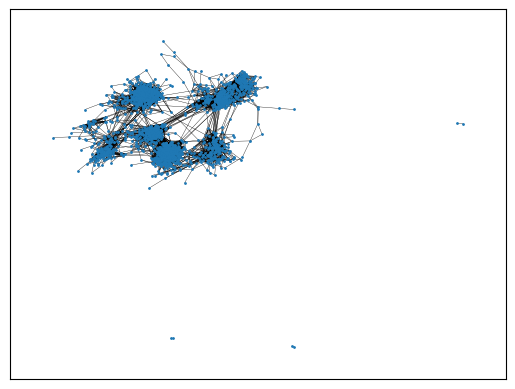

In [165]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_CLI.csv", 0.02)
G = print_graph(edge_index)

Total number of nodes:  1974
Total number of edges:  34779
Max Degree for all nodes:  81
Total number of self-loops:  0


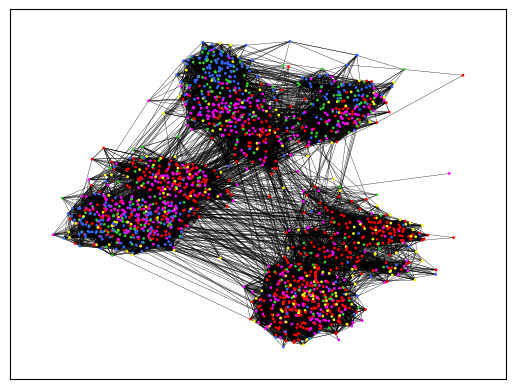

In [43]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_CLI.csv", 0.01)
G = print_graph(edge_index, labels)

Total number of nodes:  1974
Total number of edges:  83853
List of all edges:  [(0, 4), (0, 17), (0, 20), (0, 128), (0, 162), (0, 178), (0, 186), (0, 195), (0, 211), (0, 218), (0, 294), (0, 303), (0, 306), (0, 312), (0, 313), (0, 320), (0, 338), (0, 376), (0, 381), (0, 382), (0, 397), (0, 410), (0, 412), (0, 415), (0, 450), (0, 461), (0, 464), (0, 492), (0, 497), (0, 543), (0, 549), (0, 555), (0, 578), (0, 583), (0, 586), (0, 617), (0, 630), (0, 673), (0, 706), (0, 709), (0, 710), (0, 736), (0, 742), (0, 743), (0, 769), (0, 770), (0, 771), (0, 794), (0, 801), (0, 820), (0, 824), (0, 830), (0, 845), (0, 848), (0, 897), (0, 941), (0, 942), (0, 998), (0, 1007), (0, 1014), (0, 1024), (0, 1055), (0, 1119), (0, 1121), (0, 1149), (0, 1164), (0, 1191), (0, 1281), (0, 1282), (0, 1315), (0, 1321), (0, 1371), (0, 1377), (0, 1401), (0, 1402), (0, 1435), (0, 1438), (0, 1449), (0, 1479), (0, 1492), (0, 1499), (0, 1528), (0, 1545), (0, 1549), (0, 1712), (0, 1746), (0, 1762), (0, 1796), (0, 1813), (0,

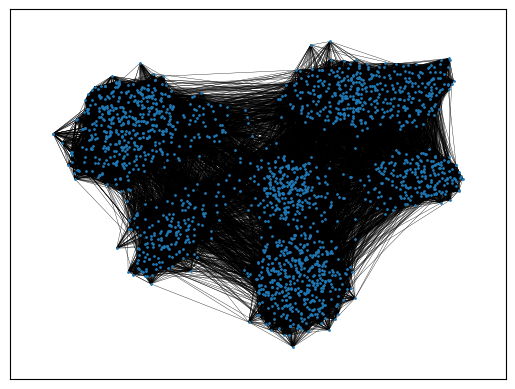

In [154]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_CLI.csv", 0.005)
G = print_graph(edge_index)

# RNA

In [4]:
snf_rna = load_adj("./data/SNF/SNF_RNA.csv")

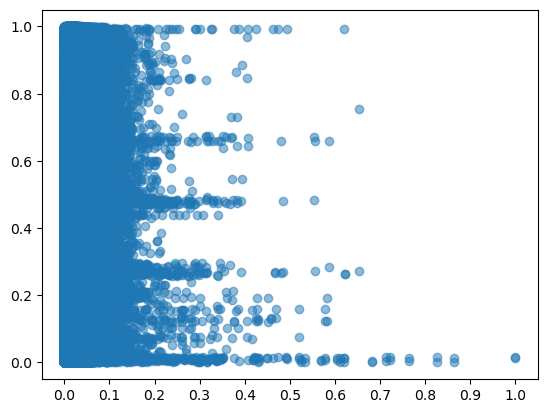

In [158]:
x= [k[0] for k in snf_rna.reshape(-1,1).tolist()]
y = np.linspace(0,1,len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i/10 for i in range(11)])
plt.show()

Total number of nodes:  114
Total number of edges:  202
Max Degree for all nodes:  14
Total number of self-loops:  0


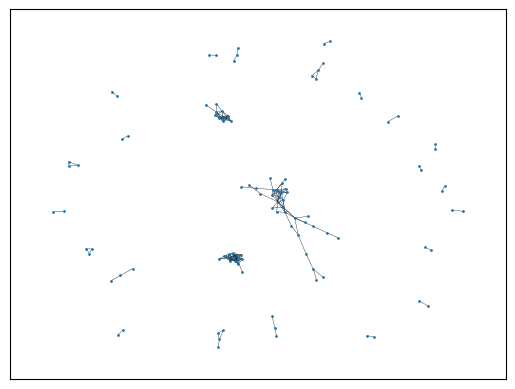

In [8]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_RNA.csv", 0.1)
G = print_graph(edge_index)

In [39]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_RNA.csv", 0.015)
G = print_graph(edge_index)

TypeError: 'NoneType' object is not subscriptable

In [36]:
np.array(labels)[np.array(G.nodes(), dtype=int)].tolist()

['#ff000',
 '#ff00f',
 '#ff00f',
 '#ff00f',
 '#ff00f',
 '#ffff0',
 '#ff00f',
 '#ff00f',
 '#ff00f',
 '#33cc3',
 '#ff000',
 '#ff00f',
 '#3366f',
 '#ff000',
 '#33cc3',
 '#ffff0',
 '#ff00f',
 '#ff00f',
 '#ff00f',
 '#ff000',
 '#ff00f',
 '#3366f',
 '#ff00f',
 '#ff000',
 '#ff00f',
 '#33cc3',
 '#ff00f',
 '#ff00f',
 '#ff00f',
 '#ff00f',
 '#ff000',
 '#ff00f',
 '#3366f',
 '#ffff0',
 '#ff00f',
 '#ff000',
 '#ff00f',
 '#3366f',
 '#ffff0',
 '#ff000',
 '#ff000',
 '#ff000',
 '#3366f',
 '#ffff0',
 '#ff000',
 '#ff00f',
 '#ff000',
 '#ff000',
 '#ff00f',
 '#ff00f',
 '#ff000',
 '#ffff0',
 '#ffff0',
 '#33cc3',
 '#ff000',
 '#ff000',
 '#ff000',
 '#ff00f',
 '#ff00f',
 '#ff000',
 '#ff000',
 '#ff000',
 '#ff00f',
 '#ff000',
 '#ff000',
 '#ff00f',
 '#ff000',
 '#ff00f',
 '#ff000',
 '#33cc3',
 '#3366f',
 '#3366f',
 '#ff00f',
 '#33cc3',
 '#3366f',
 '#ff000',
 '#ffff0',
 '#ffff0',
 '#3366f',
 '#ffff0',
 '#ff000',
 '#3366f',
 '#3366f',
 '#ff000',
 '#ff000',
 '#ff00f',
 '#ffff0',
 '#ffff0',
 '#ff000',
 '#ffff0',
 '#ff000',

Total number of nodes:  1974
Total number of edges:  187233
Max Degree for all nodes:  329
Total number of self-loops:  0


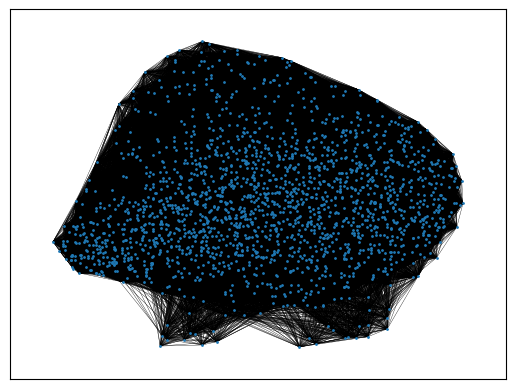

In [12]:
edge_index, edge_attr = get_edge_index("./data/SNF/SNF_RNA.csv", 0.01)
G = print_graph(edge_index)

# CNA

### K=20

In [66]:
import snf

snf_cna = snf.make_affinity(metabric["CNA"], metric="hamming", K=20, mu=0.5)
snf_cna = (snf_cna-snf_cna.min())/(snf_cna.max()-snf_cna.min())
np.fill_diagonal(snf_cna, 0)

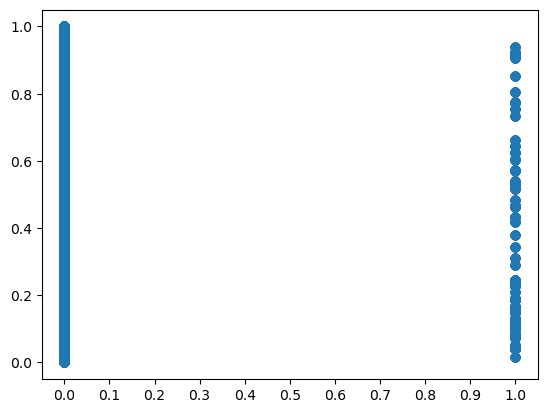

In [56]:
x= [k[0] for k in snf_cna.reshape(-1,1).tolist()]
y = np.linspace(0,1,len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i/10 for i in range(11)])
plt.show()

Total number of nodes:  65
Total number of edges:  2080
Max Degree for all nodes:  64
Total number of self-loops:  0


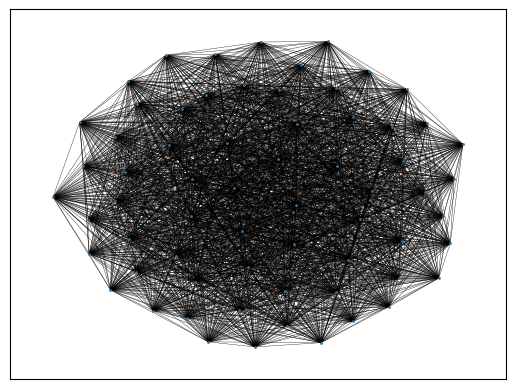

In [69]:
snf_cna[snf_cna < 0.5] = 0
edge_index, _ = to_edge_index((torch.tensor(snf_cna, dtype=torch.float).to_sparse()))

G = print_graph(edge_index)

### K=200

In [74]:
import snf

snf_cna = snf.make_affinity(metabric["CNA"], metric="hamming", K=200)
snf_cna = (snf_cna-snf_cna.min())/(snf_cna.max()-snf_cna.min())
np.fill_diagonal(snf_cna, 0)

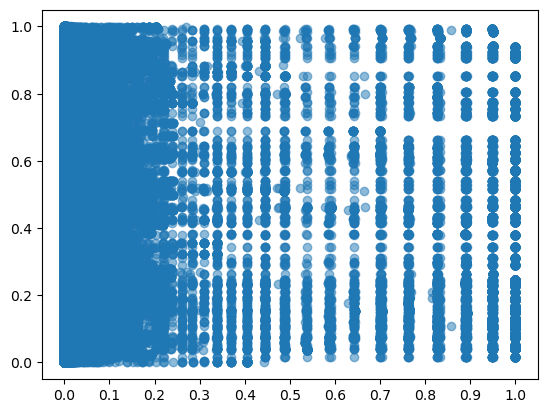

In [75]:
x= [k[0] for k in snf_cna.reshape(-1,1).tolist()]
y = np.linspace(0,1,len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i/10 for i in range(11)])
plt.show()

Total number of nodes:  1953
Total number of edges:  87143
Max Degree for all nodes:  270
Total number of self-loops:  0


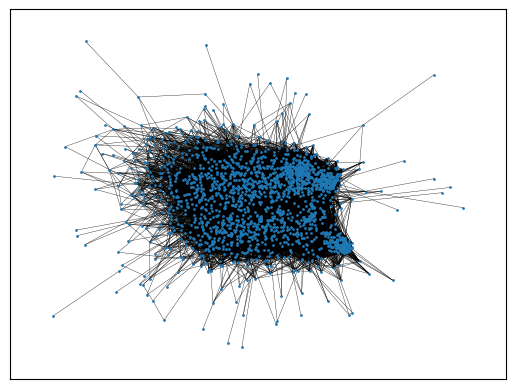

In [77]:
X = snf_cna.copy()
X[X < 0.005] = 0
edge_index, _ = to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))

G = print_graph(edge_index)

### metric = correlation

In [78]:
import snf

snf_cna = snf.make_affinity(metabric["CNA"], metric="correlation", K=200)
snf_cna = (snf_cna-snf_cna.min())/(snf_cna.max()-snf_cna.min())
np.fill_diagonal(snf_cna, 0)

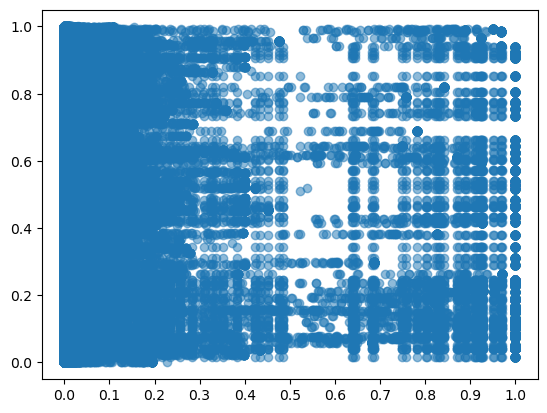

In [79]:
x= [k[0] for k in snf_cna.reshape(-1,1).tolist()]
y = np.linspace(0,1,len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i/10 for i in range(11)])
plt.show()

Total number of nodes:  1836
Total number of edges:  37933
Max Degree for all nodes:  173
Total number of self-loops:  0


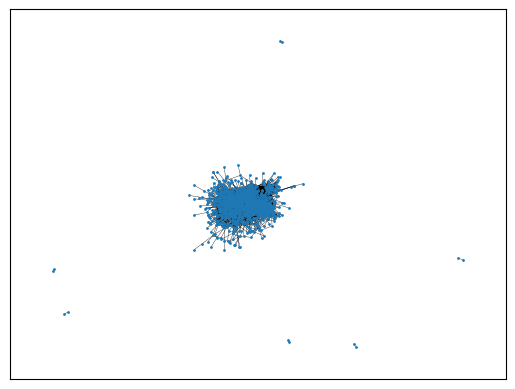

In [83]:
X = snf_cna.copy()
X[X < 0.02] = 0
edge_index, _ = to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))

G = print_graph(edge_index)

Total number of nodes:  1974
Total number of edges:  114353
Max Degree for all nodes:  268
Total number of self-loops:  0


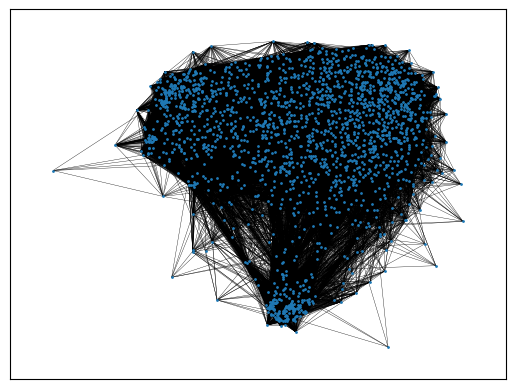

In [84]:
X = snf_cna.copy()
X[X < 0.01] = 0
edge_index, _ = to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))

G = print_graph(edge_index)

In [85]:
import snf

snf_cna = snf.make_affinity(metabric["CNA"], metric="correlation", K=5)
snf_cna = (snf_cna-snf_cna.min())/(snf_cna.max()-snf_cna.min())
np.fill_diagonal(snf_cna, 0)

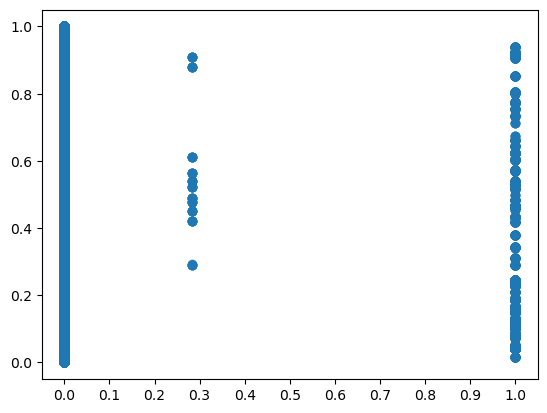

In [86]:
x= [k[0] for k in snf_cna.reshape(-1,1).tolist()]
y = np.linspace(0,1,len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i/10 for i in range(11)])
plt.show()

Total number of nodes:  84
Total number of edges:  2163
Max Degree for all nodes:  64
Total number of self-loops:  0


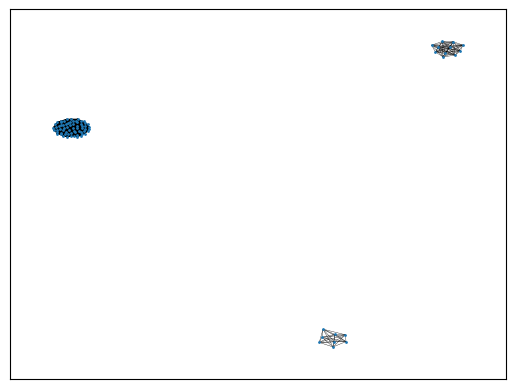

In [87]:
X = snf_cna.copy()
X[X < 0.1] = 0
edge_index, _ = to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))

G = print_graph(edge_index)

# CLI+RNA+CNA

In [2]:
import snf
snf_cli = load_adj("./data/SNF/SNF_CLI.csv")
snf_rna = load_adj("./data/SNF/SNF_RNA.csv")
snf_cna = load_adj("./data/SNF/SNF_CNA.csv")
snf_all = snf.compute.snf([snf_cli, snf_rna, snf_cna], K=200)

In [3]:
X = snf_all.copy()
np.fill_diagonal(X, 0)
X = (X-X.min())/(X.max()-X.min())

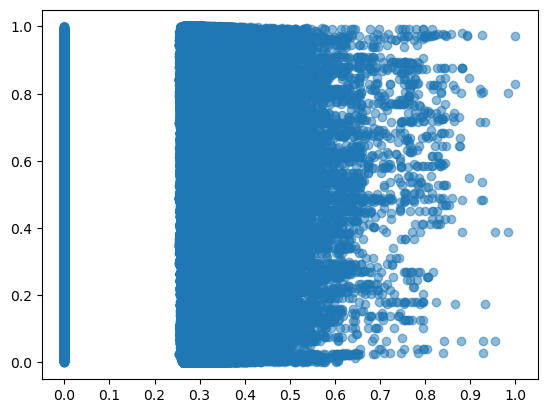

In [93]:
x = [k[0] for k in X.reshape(-1, 1).tolist()]
y = np.linspace(0, 1, len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i / 10 for i in range(11)])
plt.show()

Total number of nodes:  1974
Total number of edges:  1947351
Max Degree for all nodes:  1973
Total number of self-loops:  0


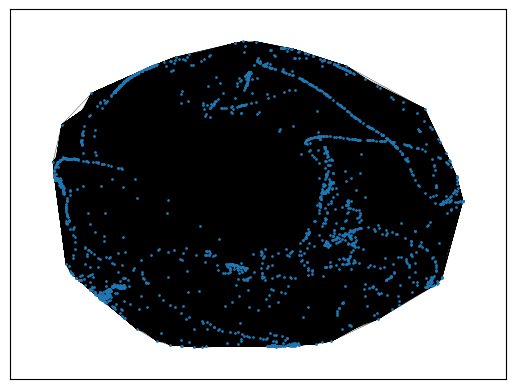

In [4]:
X[X < 0.2] = 0
edge_index, _ =  to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))
G = print_graph(edge_index)

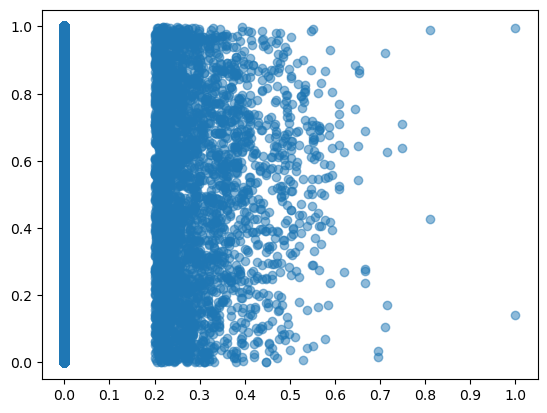

In [11]:
import snf

def min_max_normalisation(X):
    return (X-X.min())/(X.max()-X.min())

snf_cli = snf.make_affinity(metabric["CLI"], metric="hamming", K=5)
snf_cli = min_max_normalisation(snf_cli)
snf_rna = snf.make_affinity(metabric["RNA"], metric="correlation", K=5)
snf_rna = min_max_normalisation(snf_rna)
snf_cna = snf.make_affinity(metabric["CNA"], metric="correlation", K=5)
snf_cna = min_max_normalisation(snf_cna)

snf_all = snf.compute.snf([snf_cli, snf_rna, snf_cna], K=5)

np.fill_diagonal(snf_all, 0)
snf_all = min_max_normalisation(snf_all)

x = [k[0] for k in X.reshape(-1, 1).tolist()]
y = np.linspace(0, 1, len(x))

plt.scatter(x, y, alpha=0.5)
plt.xticks([i / 10 for i in range(11)])
plt.show()

Total number of nodes:  1971
Total number of edges:  7397
Max Degree for all nodes:  18
Total number of self-loops:  0


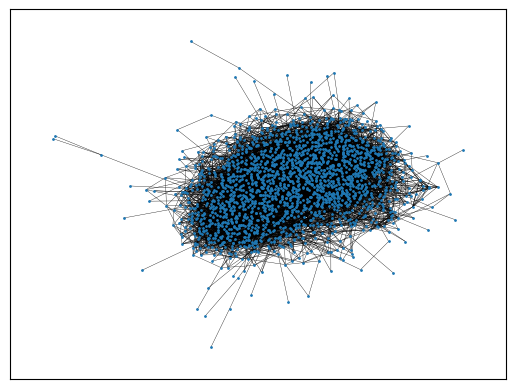

In [12]:
X = snf_all.copy()
X[X < 0.1] = 0
edge_index, _ =  to_edge_index((torch.tensor(X, dtype=torch.float).to_sparse()))
G = print_graph(edge_index)

In [26]:
print_graph(edge_index, labels[np.array(G.nodes())].tolist())


KeyboardInterrupt: 